# Gaussian Random Field Generation in Python

### Initialization

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Import the [randomfield package](http://randomfield.readthedocs.org/en/stable/randomfield/index.html).

Note that this import statement generates a warning originating in `astropy` (due to recent changes in ipython notebook), which should disapear when [this pull request](https://github.com/astropy/astropy/pull/4078) is merged.

In [2]:
import randomfield
print randomfield.__version__

0.1


/Users/david/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Initialize a generator using the default Planck13 cosmology. We use a thin slab (nx = 8) here to speed up this example.

In [3]:
%time generator = randomfield.Generator(8, 256, 4096, grid_spacing_Mpc_h=1.0, verbose=True)

Allocated 32.0 Mb for 8 x 256 x 4096 grid.
1.0 Mpc/h spacing covered by k = 0.00153 - 5.44140 h/Mpc.
Grid has z < 2.561 with 571.7699 deg x 18296.6356 deg  = 10461464.8373 deg**2 field of view.
CPU times: user 1.21 s, sys: 43.1 ms, total: 1.26 s
Wall time: 1.26 s


### Generate a random delta field realization

Generate a delta field realization that samples a smoothed linear matter power spectrum. The plot shows a 1 Mpc/h thick slice through the generated field, divided into four sections.  The horizontal axis shows redshift values and the expanding wedge shows a 3.5 degree field of view.

Delta field has standard deviation 1.795.


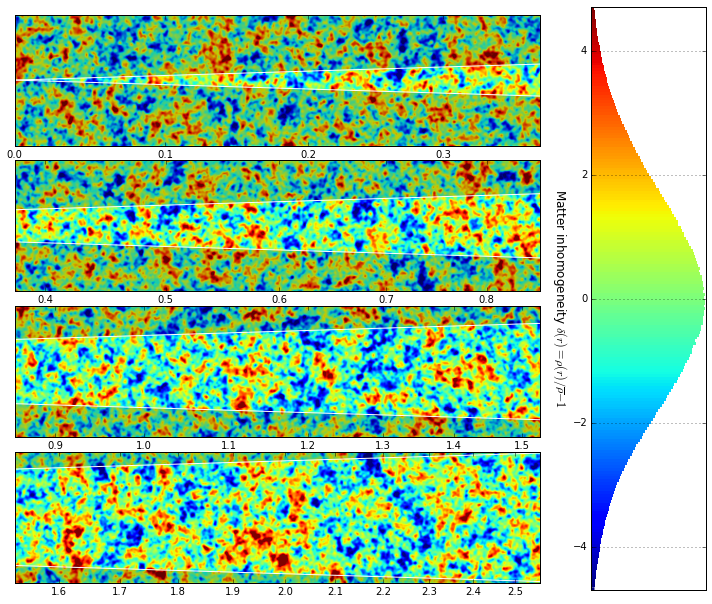

In [4]:
delta = generator.generate_delta_field(smoothing_length_Mpc_h=2.0, seed=123, show_plot=True)

Plot the input and smoothed power spectra:

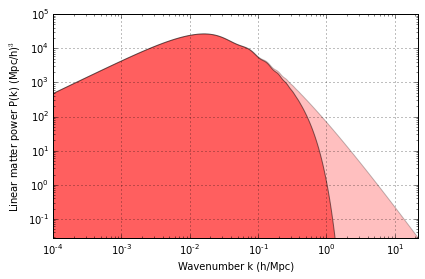

In [5]:
def plot_power(g):
    k, Pk = g.power['k'], g.power['Pk']
    ks, Pks = g.smoothed_power['k'], g.smoothed_power['Pk']
    plt.fill_between(k, Pk, facecolor='red', alpha=0.25)
    plt.fill_between(k, Pks, facecolor='red', alpha=0.5)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(k[0], k[-1])
    plt.ylim(np.min(Pk),None)
    plt.grid()
    plt.xlabel('Wavenumber k (h/Mpc)')
    plt.ylabel('Linear matter power P(k) (Mpc/h)$^{3}$')
    plt.tight_layout()
    plt.show()
plot_power(generator)

### Convert the delta field to a light-cone physical density

Convert the delta field to physical densities along our light cone. The normal delta field distribution is transformed to a log-normal density field distribution with the same mean and variance, so that all densities are positive.

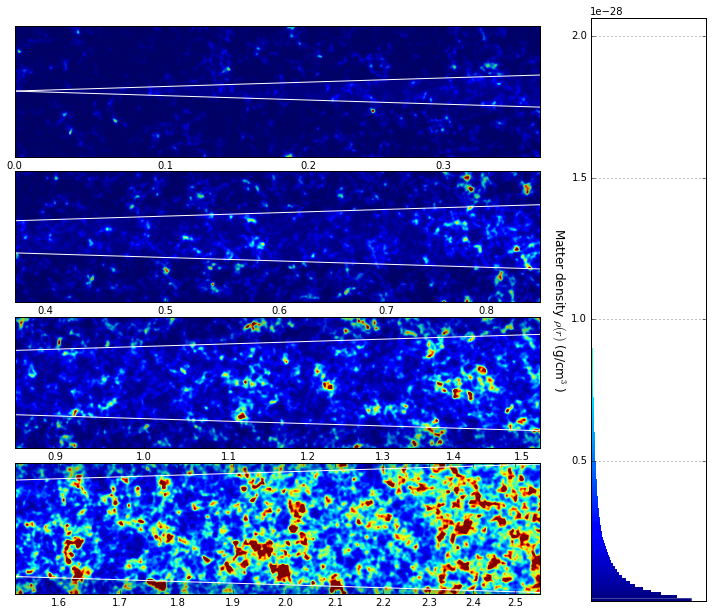

In [6]:
density = generator.convert_delta_to_density(show_plot=True)

Show the redshift evolution of physical density fluctuations along our light cone:

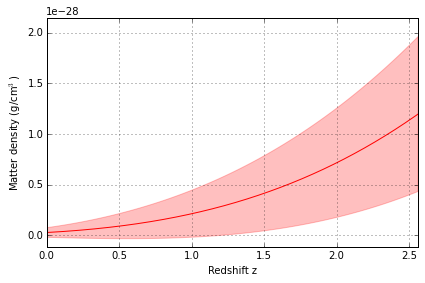

In [7]:
def plot_density_evolution(g):
    z = g.redshifts
    rho_0 = g.mean_matter_density
    rho_sigma = rho_0 * g.delta_field_rms * g.growth_function
    plt.plot(z, rho_0, 'r-')
    plt.fill_between(z, rho_0 - rho_sigma, rho_0 + rho_sigma, color='r', alpha=0.25)
    #sigmas = np.percentile(density, (15.865, 84.134), axis=(0,1))
    #plt.plot(z, sigmas[0], 'k--', label='-1$\sigma$')
    #plt.plot(z, sigmas[1], 'k--', label='+1$\sigma$')
    plt.xlim(z[0], z[-1])
    y_min = np.min(rho_0 + rho_sigma)
    y_max = np.max(rho_0 + rho_sigma)
    y_pad = 0.1 * (y_max - y_min)
    plt.ylim(y_min - y_pad, y_max + y_pad)
    plt.xlabel('Redshift z')
    plt.ylabel('Matter density (g/cm$^3$)')
    plt.grid()
    plt.tight_layout()
    plt.show()
plot_density_evolution(generator)

### Calculate the Newtonian potential

Calculate the Newtonian potential $\Phi(r)$ of the linear density field at z=0:

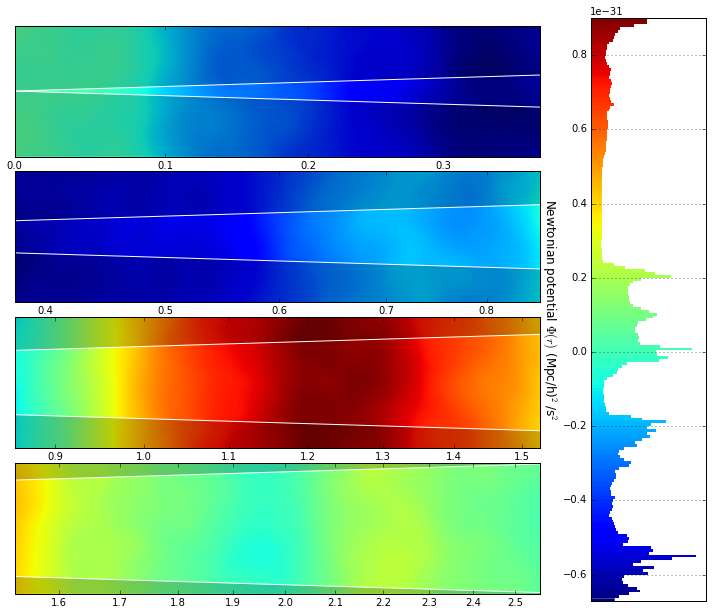

In [8]:
phi = generator.calculate_newtonian_potential(show_plot=True)